## Частина третя: Аналіз датасет c Kaggle.com

У цій частині домашньої роботи ми ще більше заглибимося в бібліотеку pandas та розглянемо просунутіші функції.

Для цієї вправи ми використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на Kaggle.com. Завантажте файл csv за посиланням і перемістіть його в ту саму директорію, де знаходиться ваш робочий ноутбук (для зручності). Після цього переходьте до завдання

Для виконання цієї частини домашнього завдання потрібно буде не тільки написати код, а й відповісти на супутні запитання. Там, де ви побачите виділений жирним шрифтом напис відповідь: потрібно буде вставити питання у файл і відповідь на нього.

Наприклад:

Яка бібліотека використовується для роботи з датафреймами у python? Відповідь: pandas
Необхідно виконати:

Прочитайте csv файл (використовуйте функцію read_csv)
Виведіть перші п'ять рядків (використовується функція head)
Виведіть розміри датасету (використовуйте атрибут shape)
Відповідь: Про скільки книг зберігає дані датасет?
Для кожної з книг доступні 7 змінних (колонок). Давайте розглянемо їх детальніше:

Name - назва книги

Author - автор

User Rating - рейтинг (за 5-бальною шкалою)

Reviews - кількість відгуків

Price - ціна (у доларах станом на 2020 рік)

Year - рік, коли книга потрапила до рейтингу Топ-50

Genre - жанр

Для спрощення подальшої роботи давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

### Первинне дослідження даних

In [260]:
import pandas as pd

df = pd.read_csv('bestsellers with categories.csv')
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [11]:
print('Питання: Про скільки книг зберігає дані датасет? Відповідь: ', df.shape[0])

Питання: Про скільки книг зберігає дані датасет? Відповідь:  550


##### Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [257]:
missing_values = df.isna().sum()
missing_values

if sum(missing_values) > 0:
    print('Чи є в якихось змінних пропуски?: Так')
else:
    print('Чи є в якихось змінних пропуски?: Ні')

Чи є в якихось змінних пропуски?: Ні


##### Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [35]:
unique_genre = df['genre'].unique()
formated_genre =  ', '.join(unique_genre)

print(f'Питання: Які є унікальні жанри? Відповідь: {formated_genre}')

Питання: Які є унікальні жанри? Відповідь: Non Fiction, Fiction


##### Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

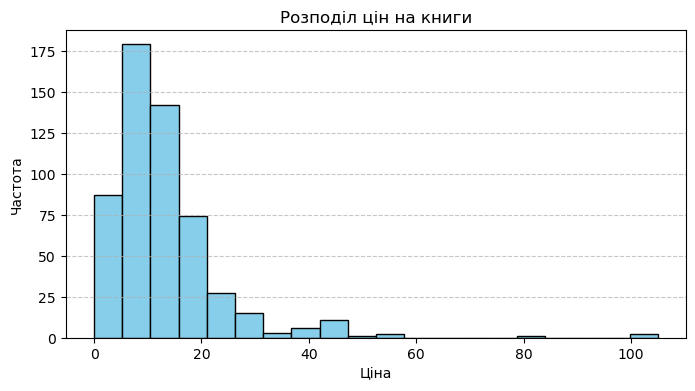

In [350]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл цін на книги')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [49]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f'Максимальна ціна? Відповідь: {max_price}')
print(f'Мінімальна ціна? Відповідь: {min_price}')
print(f'Середня ціна? Відповідь: {mean_price}')
print(f'Медіанна ціна? Відповідь: {median_price}')

Питання: Максимальна ціна? Відповідь: 105
Питання: Мінімальна ціна? Відповідь: 0
Питання: Середня ціна? Відповідь: 13.1
Питання: Медіанна ціна? Відповідь: 11.0


### Пошук та сортування даних

##### Який рейтинг у датасеті найвищий?

In [76]:
max_rating = df['user_rating'].max()
print(f'Відповідь: {max_rating}')

Відповідь: 4.9


##### Скільки книг мають такий рейтинг?

In [84]:
max_rating_books = df[df['user_rating'] == max_rating]
count_books = max_rating_books['name'].count()
print(f'Відповідь: {count_books}')

Відповідь: 52


##### Яка книга має найбільше відгуків?

In [107]:
max_index = df['reviews'].idxmax() #індекс 534
max_reviews_book = df.loc[max_index, 'name']

print(f'Відповідь: {max_reviews_book}')

Відповідь: Where the Crawdads Sing


##### З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [159]:
all_books_2015 = df[df['year'] == 2015]
index_top_price_book_2015 = all_books_2015['price'].idxmax()
top_price_book_2015 = all_books_2015.loc[index_top_price_book_2015, 'name']

print(f'Найдорожча книга у ТОП-50 у 2015 році: {top_price_book_2015}')

Найдорожча книга у ТОП-50 у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


##### Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [168]:
all_books_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]

print(f'{len(all_books_2010)} книг жанру Fiction потрапили до Топ-50 у 2010 році.')

20 книг жанру Fiction потрапили до Топ-50 у 2010 році.


##### Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 

In [186]:
condition = (df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))
books_with_4_9_rating = df[condition]

print(f'{len(books_with_4_9_rating)} книга з рейтингом 4.9 потрапила до рейтингу у 2010 та 2011 році.')

1 книга з рейтингом 4.9 потрапила до рейтингу у 2010 та 2011 році.


##### давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [197]:
condition2 = (df['price'] < 8.0) & (df['year'] == 2015)
books_2015_8 = df[condition2]
sorted_books = books_2015_8.sort_values(by=['price'], ascending=[True])
sorted_books

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


##### Яка книга остання у відсортованому списку? 

In [204]:
print(f"Остання книга у відсортованому списку: {sorted_books.iloc[0]['name']}")

Остання книга у відсортованому списку: To Kill a Mockingbird


### Агрегування даних та з'єднання таблиць

##### Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min)

In [214]:
df2 = df.groupby('genre')['price'].agg(['max', 'min']) 
print(f"Максимальна ціна для жанру Fiction: {df2.loc['Fiction', 'max']}")
print(f"Мінімальна ціна для жанру Fiction: {df2.loc['Fiction', 'min']}")
print(f"Максимальна ціна для жанру Non Fiction: {df2.loc['Non Fiction', 'max']}")
print(f"Мінімальна ціна для жанру Non Fiction: {df2.loc['Non Fiction', 'min']}")

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0


##### Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).

In [246]:
df3 = df.groupby('author')['name'].agg(['count'])
print(f"Якої розмірності вийшла таблиця? Відповідь: {df3.shape}")

max_books_author = df3[df3['count'] == df3['count'].max()].index[0]
print(f"Який автор має найбільше книг? Відповідь: {max_books_author}")

count_books_author = df3['count'].max()
print(f"Скільки книг цього автора? Відповідь: {count_books_author}")

Якої розмірності вийшла таблиця? Відповідь: (248, 1)
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


##### Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).

In [283]:
df4 = df.groupby('author')['user_rating'].agg(['mean'])

min_rating_author = df4[df4['mean'] == df4['mean'].min()].index[0]
print(f"У якого автора середній рейтинг мінімальний? Відповідь: {min_rating_author}")

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt


##### Який у цього автора середній рейтинг?

In [287]:
min_rating_mean = df4.loc[min_rating_author, 'mean']
print(f"Середній рейтинг автора {min_rating_author} складає {min_rating_mean}")

Середній рейтинг автора Donna Tartt складає 3.9


##### З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [304]:
df_concat = pd.concat([df3, df4], axis=1)
df_concat

,count,mean
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


##### Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [307]:
df5 = df_concat.sort_values(by=['count', 'mean'], ascending=[True, True])
df5

,count,mean
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


##### Який автор перший у списку?

In [320]:
print(f"Перший автор у списку: {df5.index[0]}")

Перший автор у списку: Muriel Barbery


### Додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

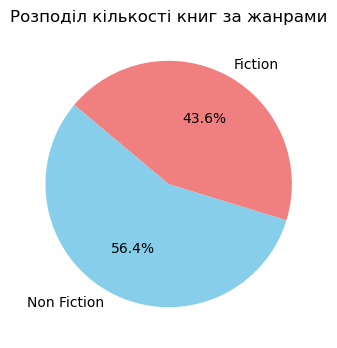

In [351]:
import matplotlib.pyplot as plt

genre_counts = df['genre'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Розподіл кількості книг за жанрами')
plt.show()

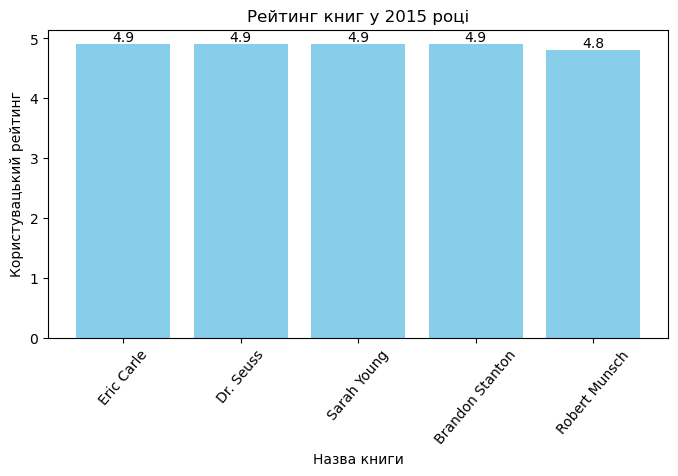

In [342]:
top_5_books_2015 = all_books_2015.sort_values(by='user_rating', ascending=False).head(5)

plt.figure(figsize=(8, 4))
bars = plt.bar(top_5_books_2015['author'], top_5_books_2015['user_rating'], color='skyblue')

plt.xticks(rotation=50)
plt.xlabel('Назва книги')
plt.ylabel('Користувацький рейтинг')
plt.title('Рейтинг книг у 2015 році')

for bar, rating in zip(bars, top_5_books_2015['user_rating']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(rating), ha='center', va='bottom')
plt.show()


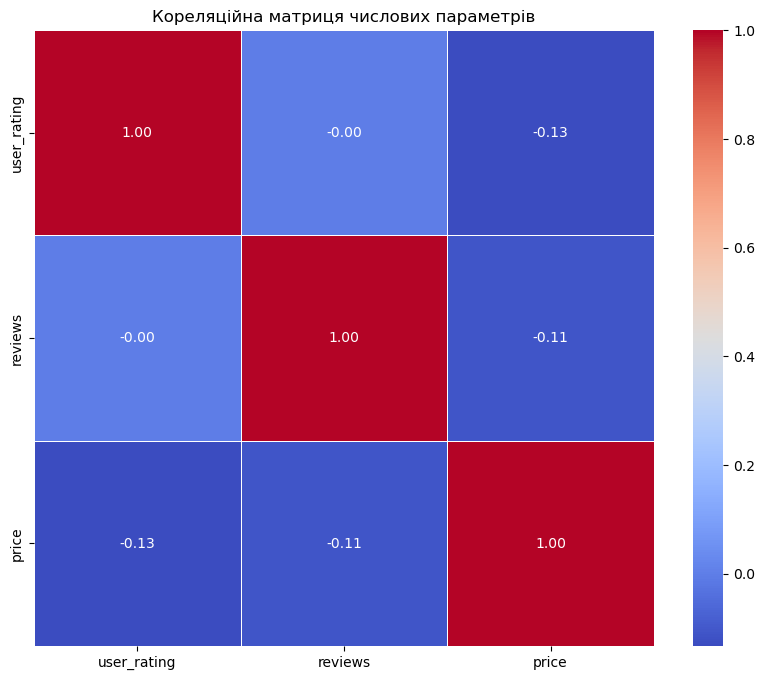

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['user_rating', 'reviews', 'price']

numeric_data = df[numeric_columns]

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Кореляційна матриця числових параметрів')
plt.show()

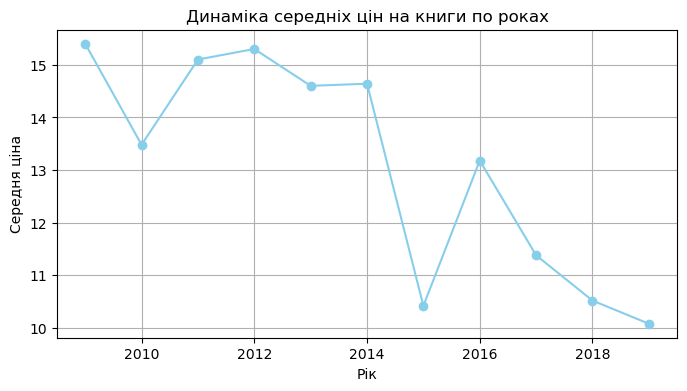

In [349]:
avg_prices_by_year = df.groupby('year')['price'].mean()

plt.figure(figsize=(8, 4))
avg_prices_by_year.plot(marker='o', linestyle='-', color='skyblue')
plt.title('Динаміка середніх цін на книги по роках')
plt.xlabel('Рік')
plt.ylabel('Середня ціна')
plt.grid(True)
plt.show()